<a href="https://colab.research.google.com/github/dohyeon-kim012/MachineLearning-DeepLearning/blob/main/DeepLearning/04.%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%20%EA%B8%B0%EC%B4%88%20%EA%B3%84%EC%82%B0%20%EC%9D%B4%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망의 기초 이론 - 그림

3층 신경망을 그려보고, 입력층과 1층 뉴런들 사이의 가중치를 그림으로 그려보면 다음과 같다

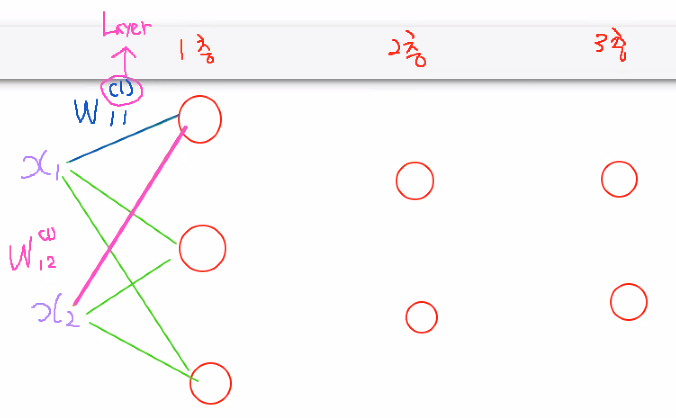

각 가중치는 다음과 같이 나타낼 수 있다

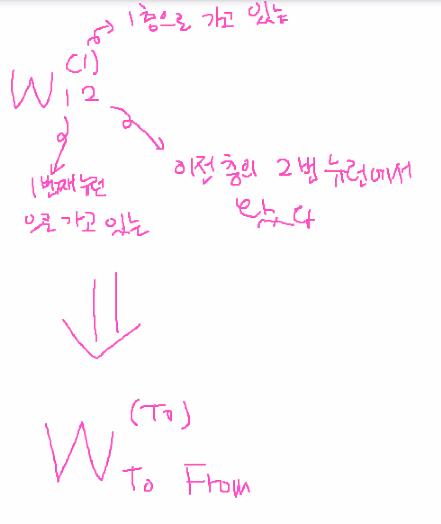

0-1 층 사이의 가중치를 행렬로 나타내면 

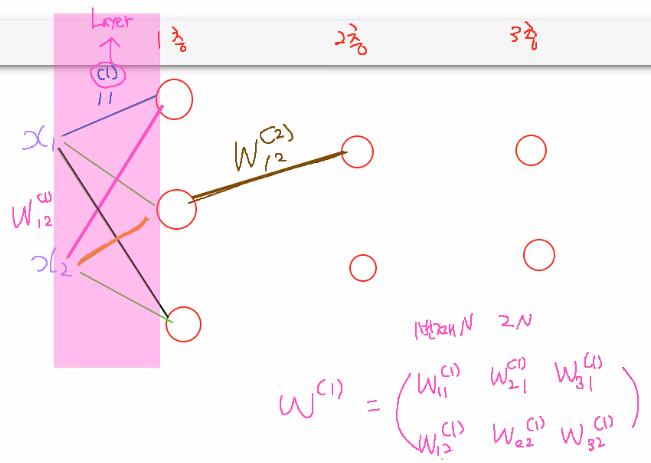

x 값에 대한 가중치의 행렬이므로 **입력값 x와 내적이 가능**

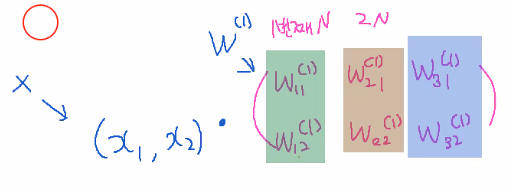

위의 내적을 통해 z 값을 구할 수 있다

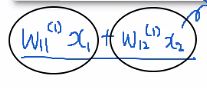

## 1층의 최종 입력값과 출력값 정리

- 편향 b 의 개수 : 항상 해당 층의 뉴런의 수와 **같다**   
- Z는 뉴련의 출력 값이기 때문에 'from'은 없다  
- A -> Z + 활성화 함수 -> 뉴런의 **최종 출력값**  
- ---> A가 다음 층에 입력되는 값이다

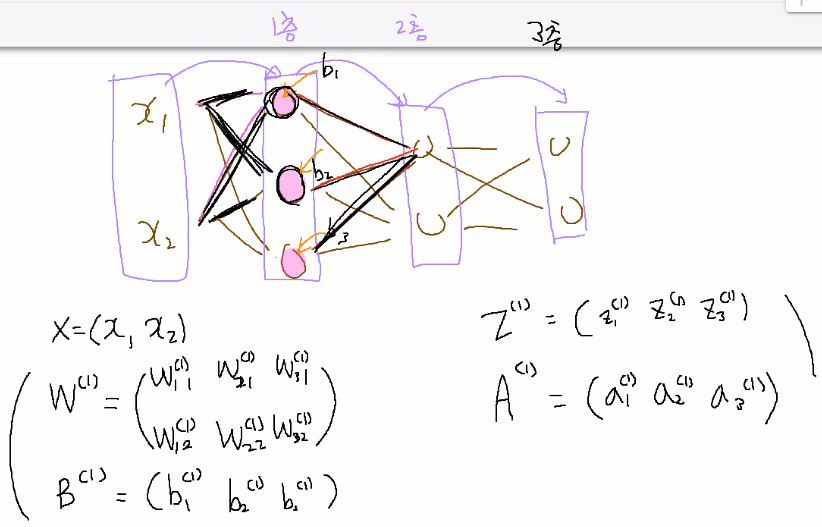

## 2층의 출력값 정리

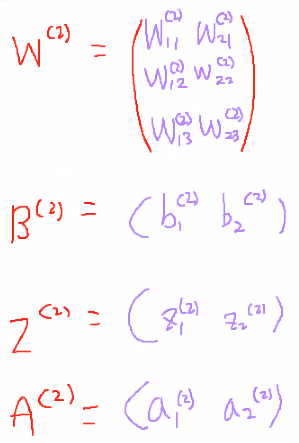

## 출력을 수식으로 나타내기  

a : 활성화 함수

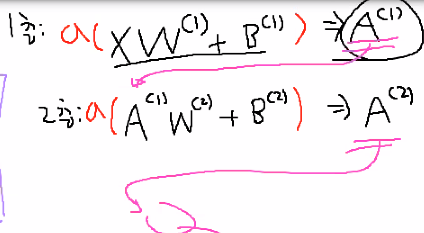


# 신경망의 입력값과 가중치

* 신경망에 입력되는 값은 여러 개이다.
* 입력값에 해당하는 가중치도 여러 개.
  * 1층의 첫 번째 뉴런에 대한 선형 조합  
  계산 : $z^{(1)}_{1} = w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2+b^{(1)}_1$

In [ ]:
import numpy as np

X = np.array([1, 2])

W = np.array([[1, 2, 3],
              [4, 5, 6]])  # 2개의 입력을 받는 3개의 뉴런

print("입력값 X의 shape : {}".format(X.shape))
print("가중치 W의 shape : {}".format(W.shape))

입력값 X의 shape : (2,)
가중치 W의 shape : (2, 3)


$X$가 1차원 배열 (2) 이기 때문에 내적 가능  
- $X \cdot W$ : 가능
- $W \cdot X$ : 불가능
- $W^T \cdot X$ : 가능

In [ ]:
Z = np.dot(X, W)
print("출력값 z : {}".format(Z))

출력값 z : [ 9 12 15]


↑ $Z = XW + B$

In [ ]:
W.T @ X

array([ 9, 12, 15])

↑  $Z = W^TX + B$  

두 가지 수식 모두 결과값은 같다

# 단순한 3층 신경망 구성하기

* 1층을 구성하는 표기
 * 1층의 1번째 뉴런만 표기 : $z_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2+b_1^{(1)}$
 * 1층 전체를 나타내기 : $Z^{(1)} = XW^{(1)} + B^{(1)}$
   * B의 원소 수는 뉴런의 개수와 같다.
 * $X = (x_1, x_2)$
 * $W^{(1)} = \begin{pmatrix}w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\ w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
 \end{pmatrix}$
 * $B^{(1)} = \begin{pmatrix}b_1^{(1)}&b_2^{(1)}&b_3^{(1)}\end{pmatrix}$
 * $Z^{(1)} = \begin{pmatrix}z_1^{(1)}&z_2^{(1)}&z_3^{(1)}\end{pmatrix}$

## 1층 구현하기

In [ ]:
# 시그모이드 함수 구현하기 - 은닉층에서 사용
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 항등 함수 구현(identity_function) - 출력층에서 사용
def identity_function(x):
    return x

In [ ]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

Z1 = np.dot(X, W1) + B1
A1 = sigmoid(Z1)

print("1층의 결과 : {}".format(A1))

1층의 결과 : [0.57444252 0.66818777 0.75026011]


In [ ]:
print(X.shape, W1.shape, B1.shape, Z1.shape, A1.shape)

(2,) (2, 3) (3,) (3,) (3,)


## 2층 구현하기

In [ ]:
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

Z2 = np.dot(A1, W2) + B2
A2 = sigmoid(Z2)

print("2층의 결과 : {}".format(A2))

2층의 결과 : [0.62624937 0.7710107 ]


In [ ]:
print(W2.shape, B2.shape, Z2.shape, A2.shape)

(3, 2) (2,) (2,) (2,)


## 3층 구현하기 ( 출력층 )

- 활성화 함수로 항등함수(`identity function`)을 사용하기

In [ ]:
W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

Z3 = np.dot(A2, W3) + B3
A3 = identity_function(Z3)

print("3층의 결과 : {}".format(A3))

3층의 결과 : [0.31682708 0.69627909]


In [ ]:
print(W3.shape, B3.shape, Z3.shape, A3.shape)

(2, 2) (2,) (2,) (2,)


# 순전파와 역전파

신경망의 순전파 ( Forward Propagation ) --> 신경망의 **추론 과정**  

신경망의 역전파 ( Back Propagation ) --> 신경망의 **학습 과정**

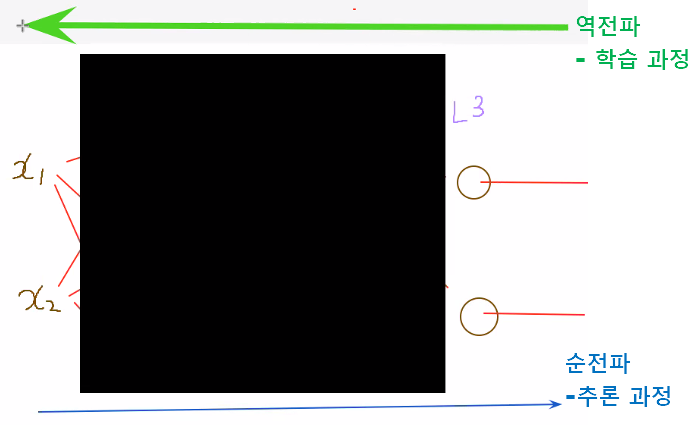

## 순전파 최종 구현

In [ ]:
# 네트워크 초기화
# 네트워크가 최초로 가지고 있어야 할 가중과 편향을 설정
# 보통은 정규분포 랜덤으로 초기화 하거나, 카이밍 히, 사비에르 초기값 등을 활용함

def init_network():
    network = {}  
    '''
    가중과 편향의 이름을 문자열로 붙여서 초기화시키는 것이 효과적 
    -> dict로 묶어주기
    '''

    # 1층 매개변수 초기화
    network["W1"] = np.array([[0.1, 0.3, 0.5],
                              [0.2, 0.4, 0.6]])
    network["B1"] = np.array([0.1, 0.2, 0.3])

    # 2층 매개변수 초기화
    network["W2"] = np.array([[0.1, 0.4],
                              [0.2, 0.5],
                              [0.3, 0.6]])
    network["B2"] = np.array([0.1, 0.2])

    # 3층 매개변수 초기화
    network["W3"] = np.array([[0.1, 0.3],
                              [0.2, 0.4]])
    network["B3"] = np.array([0.1, 0.2])

    # 최초의 매개변수만 가지고 있는 신경망 network
    return network
    

# 순전파 XW + B
def forward(network, x):
   
    # 가중치, 편향 꺼내기
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["B1"], network["B2"], network["B3"]

    # 1층 계산
    Z1 = (x @ W1) + b1
    A1 = sigmoid(Z1)

    # 2층 계산
    Z2 = (A1 @ W2) + b2
    A2 = sigmoid(Z2)

    # 3층 계산
    Z3 = (A2 @ W3) + b3
    y = identity_function(Z3)

    return y

In [ ]:
forward(init_network(), X)

array([0.31682708, 0.69627909])

In [ ]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
